In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat

In [ ]:
df = pd.read_csv('insurance.csv')

https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction

In [5]:
df.head(5)

,age,male,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   male      1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


## 1, Linearity

There must be a linear relationship between the dependent and independent variables. 

Determination
We can create scatter plot to detect linearity.

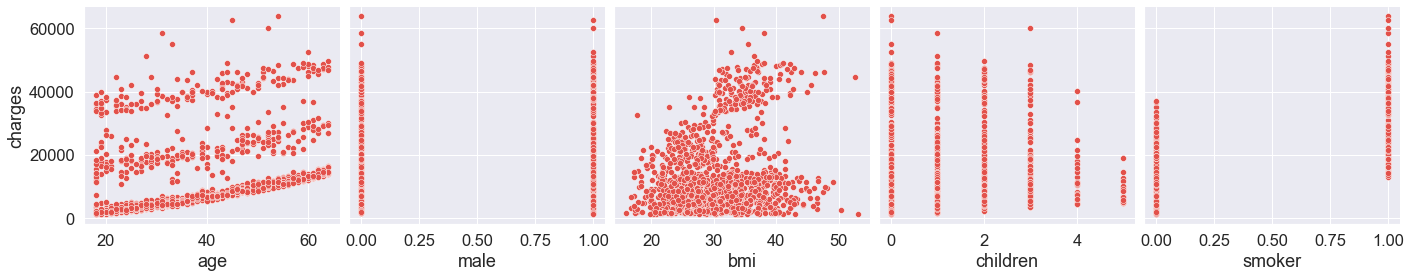

In [16]:
sns.pairplot(df, x_vars=['age', 'male','bmi','children','smoker'], 
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

In [23]:
def regression_line(x,y):
    
    m = (sum(x*y) - (sum(x)*sum(y)/len(x)))/(sum(x*x) - (sum(x)*sum(x)/len(x)))
    constant = stat.mean(y) - m*stat.mean(x)
    print(f'linear regression line: Slope = {m:.2f}, Constant = {constant:.2f}')
    
    plt.plot(x, y, 'o')
    reg_line = [(m * i) + constant for i in x]
    plt.plot(x, reg_line)
    plt.show()

linear regression line: Slope = 257.72, Constant = 3165.89


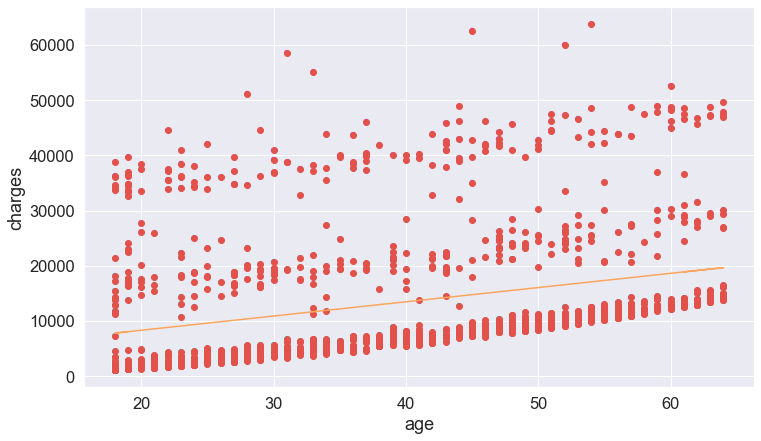

linear regression line: Slope = 1387.17, Constant = 12569.58


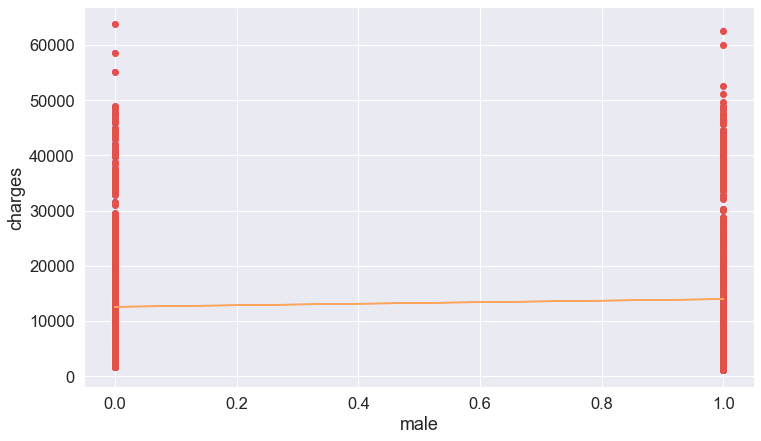

linear regression line: Slope = 393.87, Constant = 1192.94


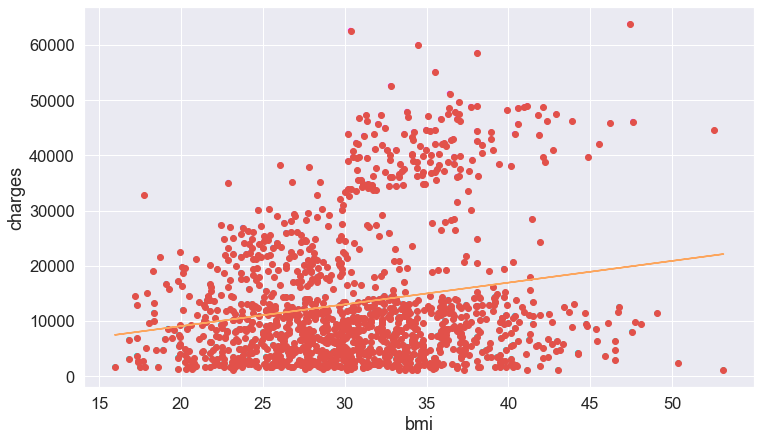

linear regression line: Slope = 683.09, Constant = 12522.50


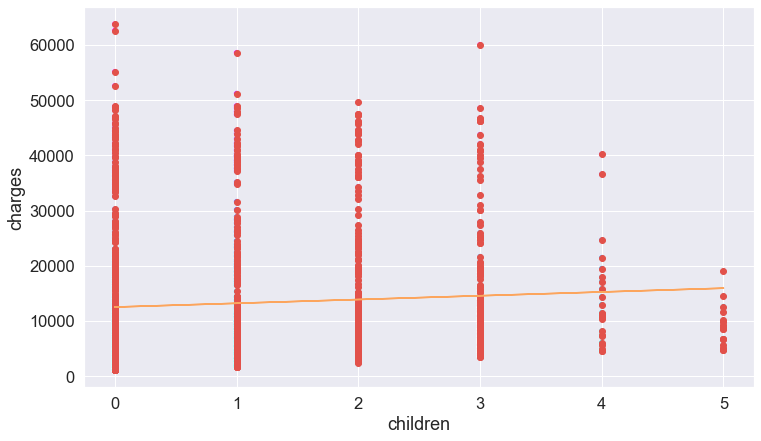

linear regression line: Slope = 23615.96, Constant = 8434.27


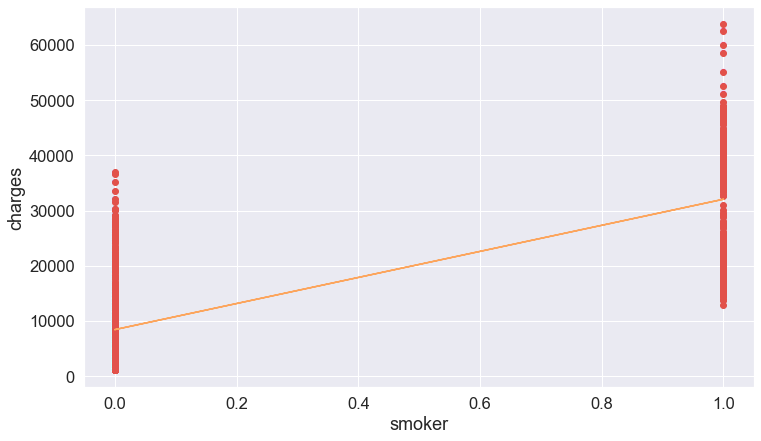

linear regression line: Slope = 1.00, Constant = 0.00


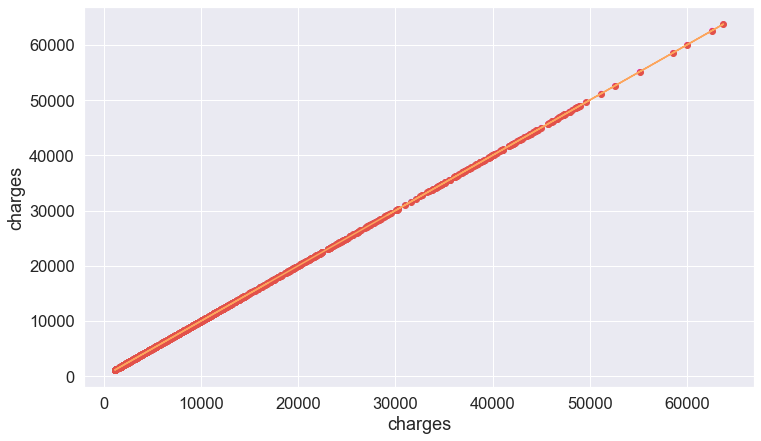

In [28]:
for i in df.columns:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=df, x=i, y='charges',hue='charges',palette='cool', legend=False)
    regression_line(df[i], df['charges'])

In [35]:
def regression_line2(x,y):
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {}β + {}  '.format(round(B1, 3),B0)
    print(reg_line)
    
    return (B0, B1, reg_line)

In [36]:
for i in df.columns:
    regression_line2(df[i], df['charges'])

y = 257.723β + 3165.885006063025  
y = 1387.172β + 12569.578843835348  
y = 393.873β + 1192.937208961157  
y = 683.089β + 12522.495549644098  
y = 23615.964β + 8434.268297856204  
y = 1.0β + 0.0  


### 2, Mean of residual

The conditional distribution of residual ui given X1i, X2i, …, Xni has a mean of zero, which means that 